In [ ]:
# Project: Kaggle Titanic
# By: Gabriel Machado (gmlg) 
# Date: 01/26/2018

In [1]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
import numpy as np

# Visualization
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import seaborn as sns

%matplotlib inline

In [2]:
# Read train and test datasets

train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [3]:
# Pre-processing

train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
train.shape

(891, 12)

In [5]:
train.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [6]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [7]:
# Transform category var

# Train
train['Sex'] = np.where(train.Sex == 'male', 1, 0)

label, unique = pd.factorize(train['Embarked'])
label = pd.DataFrame(label)
train['Embarked'] = label

# Test
test['Sex'] = np.where(test.Sex == 'male', 1, 0)

label, unique = pd.factorize(test['Embarked'])
label = pd.DataFrame(label)
test['Embarked'] = label


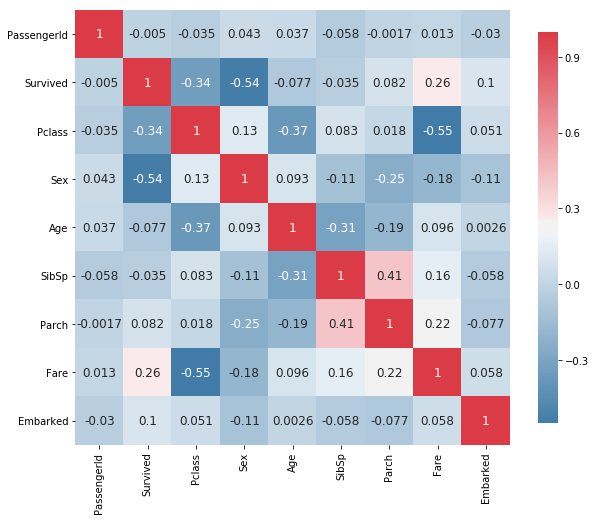

In [8]:
# Explore corr

def plot_correlation_map( df ):
    corr = df.corr()
    ay, ax = plt.subplots(figsize =(10, 8))
    cmap = sns.diverging_palette(240, 10, as_cmap = True)
    ay = sns.heatmap(
        corr, 
        cmap = cmap,
        square=True, 
        cbar_kws={ 'shrink' : .9 }, 
        ax=ax, 
        annot = True, 
        annot_kws = { 'fontsize' : 12 }
    )

plot_correlation_map(train)

In [9]:
# Drop columns 
train.drop(['Name', 'Ticket', 'Cabin', 'PassengerId'], axis=1, inplace=True)
test.drop(['Name', 'Ticket', 'Cabin'], axis=1, inplace=True)

In [10]:
# Missing values

#train.isnull().sum().sort_values(ascending=False).head(15)
#test.isnull().sum().sort_values(ascending=False).head(15)

# Set Fare in test - median
test.loc[test.Fare.isnull() & test.Pclass==1, 'Fare'] = np.nanmedian(test.Fare[test.Pclass==1])
test.loc[test.Fare.isnull() & test.Pclass==2, 'Fare'] = np.nanmedian(test.Fare[test.Pclass==2])
test.loc[test.Fare.isnull() & test.Pclass==3, 'Fare'] = np.nanmedian(test.Fare[test.Pclass==3])

# Train median age
median_class1 = np.nanmedian(train.Age[train.Pclass==1])
median_class2 = np.nanmedian(train.Age[train.Pclass==2])
median_class3 = np.nanmedian(train.Age[train.Pclass==3])

# Set Age in train
train.loc[(train.Pclass==1) & (train.Age.isnull()), 'Age']  = median_class1
train.loc[(train.Pclass==2) & (train.Age.isnull()), 'Age']  = median_class2
train.loc[(train.Pclass==3) & (train.Age.isnull()), 'Age']  = median_class3

# Set Age in test
test.loc[(test.Pclass==1) & (test.Age.isnull()), 'Age']  = median_class1
test.loc[(test.Pclass==2) & (test.Age.isnull()), 'Age']  = median_class2
test.loc[(test.Pclass==3) & (test.Age.isnull()), 'Age']  = median_class3

In [11]:
# Check missing values
test.isnull().sum().sort_values(ascending=False).head(15)

Embarked       0
Fare           0
Parch          0
SibSp          0
Age            0
Sex            0
Pclass         0
PassengerId    0
dtype: int64

In [12]:
# Target and Features
x = train.drop('Survived', axis=1)
y = train['Survived']

In [13]:
# feature selection

from sklearn.ensemble import ExtraTreesClassifier

modelo = ExtraTreesClassifier()
modelo.fit(x, y)

# Print results
print(x.columns)
print(modelo.feature_importances_)

Index(['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked'], dtype='object')
[ 0.11511348  0.27707059  0.2489075   0.05184788  0.0402125   0.23070143
  0.03614661]


In [14]:
# Scaler - but dont using.
#from sklearn.preprocessing import MinMaxScaler

#scaler = MinMaxScaler().fit(x)
#standardX = scaler.transform(x)

#x_col = x.columns
#x_scale = pd.DataFrame(standardX, columns=x_col)
#x_scale.head()

In [15]:
# Import dos módulos
from sklearn import model_selection

# Define folds
num_folds = 10
num_instances = len(x)
seed = 7

# folds
kfold = model_selection.KFold(num_folds, True, random_state = seed)

# Create model
modelo = DecisionTreeClassifier(max_depth=3, random_state=0)

# fit
modelo.fit(x, y)

# result
resultado = model_selection.cross_val_score(modelo, x, y, cv = kfold, scoring = 'accuracy')

# score
print(modelo.score(x, y))
# accuracy
print("Acurácia: %.3f (%.3f)" % (resultado.mean(), resultado.std()))

# 0.827160493827
# accuracy: 0.818 (0.055)

0.827160493827
Acurácia: 0.818 (0.055)


In [27]:
# Import do módulo
from sklearn.ensemble import GradientBoostingClassifier

# Definindo os valores para o número de folds
num_folds = 15
num_instances = len(x)
seed = 7

# Separando os dados em folds
kfold = model_selection.KFold(num_folds, True, random_state = seed)

# Create model
modelo = GradientBoostingClassifier()

# fit 
modelo.fit(x, y)

resultado = model_selection.cross_val_score(modelo, x, y, cv = kfold, scoring = 'accuracy')

print(modelo.score(x, y))
print("Acurácia: %.3f (%.3f)" % (resultado.mean(), resultado.std()))

# 0.901234567901
# accuracy: 0.823 (0.051)

# 0.89898989899
# accuracy: 0.825 (0.048)

# num_folds = 15
# 0.901234567901
# accuracy: 0.828 (0.059)

0.901234567901
Acurácia: 0.828 (0.059)


In [26]:
# Save result from the best model
df_result = pd.DataFrame()
df_result['PassengerId'] = test['PassengerId']

test_predict = test.drop('PassengerId', axis=1)

df_result['Survived'] = modelo.predict(test_predict)
df_result.to_csv('result_v7_1.csv', index=False)